<a href="https://colab.research.google.com/github/Mashi25/Pro-capitas-Internship/blob/main/ProCapitas_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description: This is a sentiment analysis program that parses the tweets from twitter using python

In [1]:
#import the libraries
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [2]:
#Get auth codes
consumer_key = "JVWwfHwPBzLoDc2DfFaFL5gmU"
consumer_key_secret= "AeMHhW4ORfwU1nb8eWJg4PP7P8kULKOUPn37nrWFeH1E2W4pZn"
access_token = "2943199105-fvKLhg03gbnMPTBAfMyiDWo8fm574aVsnAcSRml"
access_token_secret="Iu7NIQYPaXGURY8aeVVozGyV4QQOXZOYOrROp6Ad3641D"

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth, wait_on_rate_limit= True)

In [4]:
#Hashtag to be searched
search_words="#DataScience"

data = tweepy.Cursor(api.search,q=search_words,lang="en",tweet_mode="extended").items(1000)

In [5]:
all_tweets = []

for tweet in data:
    #print('\n'.join(dir(tweet)))
    all_tweets.append([tweet._json['full_text'],tweet.created_at,tweet.user.location,tweet.retweet_count,tweet.user.followers_count,tweet.user.name])



In [6]:
#create a dataframe
df = pd.DataFrame(all_tweets, columns=['Tweets','Created_at','Location','Retweet','Followers_count','user'])
df

,Tweets,Created_at,Location,Retweet,Followers_count,user
0,RT @rmarkdown: Data Visualization Packages for...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea
1,RT @mdancho84: This used to be me when I was f...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️
2,RT @Khulood_Almani: Why Governments Need to Re...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
3,RT @UshaDasari3: I invite all of you to celebr...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
...,...,...,...,...,...,...
995,Bayesian Machine Learning (Part 8) - https://t...,2022-12-10 09:51:06,,4,147039,Machine Learning
996,RT @IBMData: Why is #datascience important? 📊 ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem
997,RT @tut_ml: SQL Queries run in this order.\nLe...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal
998,RT @sonu_monika: Please share your thoughts??\...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal


In [7]:
#Clean the text
#Create function to clean tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',text)
  text = re.sub(r'https?:\/\/\S+', '',text)


  return text


In [8]:
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#showcleaned text
df

,Tweets,Created_at,Location,Retweet,Followers_count,user
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
...,...,...,...,...,...,...
995,Bayesian Machine Learning (Part 8) - #Datas...,2022-12-10 09:51:06,,4,147039,Machine Learning
996,RT : Why is #datascience important? 📊 \n\nData...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal


In [9]:
#Remove Emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [10]:
df['Tweets'] = df['Tweets'].apply(deEmojify)
df

,Tweets,Created_at,Location,Retweet,Followers_count,user
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
...,...,...,...,...,...,...
995,Bayesian Machine Learning (Part 8) - #Datas...,2022-12-10 09:51:06,,4,147039,Machine Learning
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal


In [11]:
#5 most viral tweets
a=df['Retweet'].nlargest(n=5)
a

545    545
152    375
154    375
409    375
871    280
Name: Retweet, dtype: int64

In [12]:
df['user'].loc[861:862]

861    Data science
862    Abel Linares
Name: user, dtype: object

In [13]:
df['user'].loc[311:312]

311            P,V,Babu@
312    Samantha Richards
Name: user, dtype: object

In [14]:
df['user'].loc[978]

'Programmatic.Solutions'

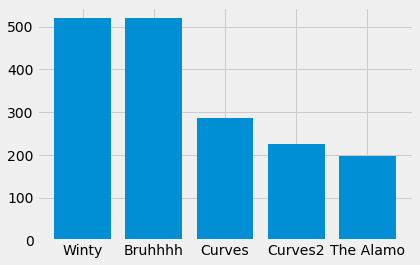

In [15]:
#Top 5 most viral tweets
x=['Winty', 'Bruhhhh', 'Curves', 'Curves2', 'The Alamo']
y=[520,520,287,226,197]
plt.bar(x,y)
plt.show()

In [16]:
df['Location'] = df['Location'].replace(r'^\s*$', np.nan, regex = True)
df

,Tweets,Created_at,Location,Retweet,Followers_count,user
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
...,...,...,...,...,...,...
995,Bayesian Machine Learning (Part 8) - #Datas...,2022-12-10 09:51:06,NaN,4,147039,Machine Learning
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal


In [17]:
df.dropna(inplace=True)
df

,Tweets,Created_at,Location,Retweet,Followers_count,user
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
...,...,...,...,...,...,...
993,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:52:05,"Basildon, East",1,335,Alan Mutton
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal


In [18]:
LocationCount = df['Location'].str.split(', ').explode().value_counts()
LocationCount


UK                               88
Kingdom of Saudi Arabia          69
LA                               53
New Orleans                      53
India                            39
                                 ..
Conquense currently in Berlin     1
warangal                          1
North Atlantic Realm              1
uk                                1
Dwarka                            1
Name: Location, Length: 237, dtype: int64

In [19]:
#Influential people talking about our product
Popular = df[df['Followers_count'] >= 1000]
Popular

,Tweets,Created_at,Location,Retweet,Followers_count,user
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬
7,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:13,localhost,0,1425,Femi Ola🇳🇬
10,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:02:52,localhost,0,1425,Femi Ola🇳🇬
11,RT _Almani: This is the e-bike for winter comm...,2022-12-10 13:02:42,Kingdom of Saudi Arabia,24,40923,Dr. Khulood Almani | د.خلود المانع #CES2023
...,...,...,...,...,...,...
974,RT : 8 Levels of Using Type Hints in Python \n...,2022-12-10 09:59:44,United Kingdom,5,10553,Dan Fiehn
975,"via - Introducing Hyperstack #bi, #bigdata, ...",2022-12-10 09:59:35,"Paris, France",0,5294,Big Data Analytics
980,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:58:36,United Kingdom,33,10553,Dan Fiehn
982,RT : 3 Hidden Problems Of Bad Data And Why You...,2022-12-10 09:58:23,France,12,107780,Nicolas Babin #CES2023


In [20]:
len(Popular)

445

In [21]:
#Sentiment analysis
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity




In [22]:
#create new 2 columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)
df

,Tweets,Created_at,Location,Retweet,Followers_count,user,Subjectivity,Polarity
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea,0.000000,0.000000
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️,0.333333,0.250000
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023,0.000000,0.000000
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar,0.666667,0.166667
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬,0.400000,0.800000
...,...,...,...,...,...,...,...,...
993,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:52:05,"Basildon, East",1,335,Alan Mutton,0.000000,0.000000
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem,0.400000,0.150000
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal,0.800000,0.400000
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal,0.000000,0.000000


In [23]:
# function to compute negative,neutral and positive analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df
  

,Tweets,Created_at,Location,Retweet,Followers_count,user,Subjectivity,Polarity,Analysis
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea,0.000000,0.000000,Neutral
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️,0.333333,0.250000,Positive
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023,0.000000,0.000000,Neutral
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar,0.666667,0.166667,Positive
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬,0.400000,0.800000,Positive
...,...,...,...,...,...,...,...,...,...
993,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:52:05,"Basildon, East",1,335,Alan Mutton,0.000000,0.000000,Neutral
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem,0.400000,0.150000,Positive
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal,0.800000,0.400000,Positive
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal,0.000000,0.000000,Neutral


In [24]:
#Positive Comments
Count = df['Analysis'].str.split(', ').explode().value_counts()
Count

Neutral     431
Positive    211
Negative     69
Name: Analysis, dtype: int64

In [25]:
positive_percent = (216/len(df))*100
print(round(positive_percent),"%")

30 %


In [26]:
filtered_df2 = df.loc[(df['Created_at'] >= '2022-12-01')
                     & (df['Created_at'] <= '2022-12-31')]

In [27]:
filtered_df2
#Cannot find the trend as the data is restricted to today

,Tweets,Created_at,Location,Retweet,Followers_count,user,Subjectivity,Polarity,Analysis
0,RT : Data Visualization Packages for R you sho...,2022-12-10 13:04:12,Colombia,20,532,Dra Andrea,0.000000,0.000000,Neutral
1,RT : This used to be me when I was first learn...,2022-12-10 13:04:03,République du Bénin,75,145,Lichtbedeckt ☀️🕊️,0.333333,0.250000,Positive
2,RT _Almani: Why Governments Need to Regulate #...,2022-12-10 13:03:54,Kingdom of Saudi Arabia,76,40923,Dr. Khulood Almani | د.خلود المانع #CES2023,0.000000,0.000000,Neutral
3,RT : I invite all of you to celebrate the fare...,2022-12-10 13:03:49,"Kamareddy, India",24,263,Bhimari Bhaskar,0.666667,0.166667,Positive
4,"Hey Dev, Take This SURVEY &amp; Win A MacBook ...",2022-12-10 13:03:44,localhost,0,1425,Femi Ola🇳🇬,0.400000,0.800000,Positive
...,...,...,...,...,...,...,...,...,...
993,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:52:05,"Basildon, East",1,335,Alan Mutton,0.000000,0.000000,Neutral
996,RT : Why is #datascience important? \n\nData ...,2022-12-10 09:50:58,"Dubai, United Arab Emirates",14,173,Safiyya Kareem,0.400000,0.150000,Positive
997,RT _ml: SQL Queries run in this order.\nLearn ...,2022-12-10 09:50:57,"Rajasthan, India",87,147,sonal rawal,0.800000,0.400000,Positive
998,RT _monika: Please share your thoughts??\n#Big...,2022-12-10 09:50:57,"Rajasthan, India",33,147,sonal rawal,0.000000,0.000000,Neutral



We need to come up with the insights such as:


*   How many % of tweets were of positive sentiments: 34%
*   Top 5 most viral tweets (based upon retweets):Winty,Bruhhhh,Curves,The Alamo
*   How many influential people are talking about our product (whose followers are greater than 1000):343
*   Which geographical location has the most tweets: India & UK


